<a href="https://colab.research.google.com/github/nireasir/auth-dws-ml2526/blob/main/auth-dws-ml2526/MLex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ερώτημα 1

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [86]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [87]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

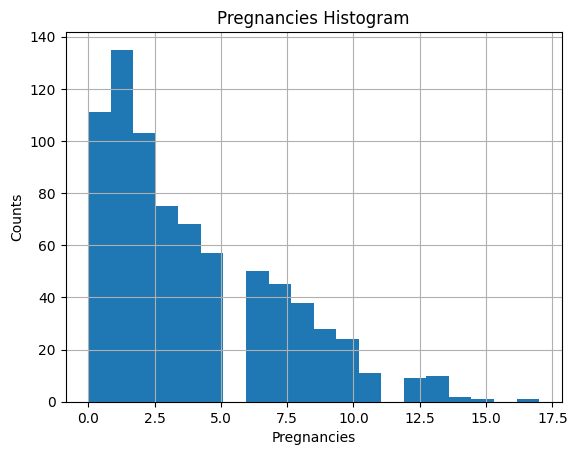

In [88]:
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

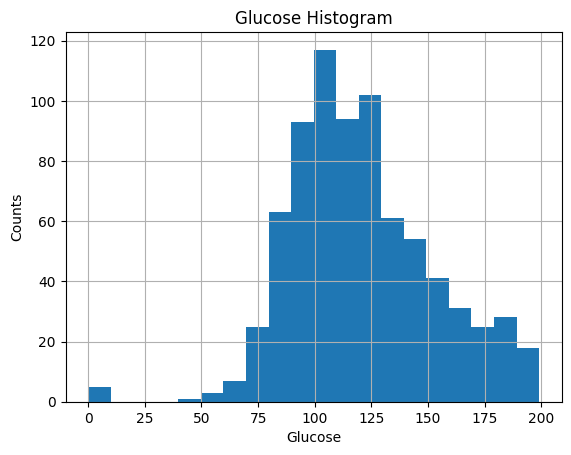

In [89]:
df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

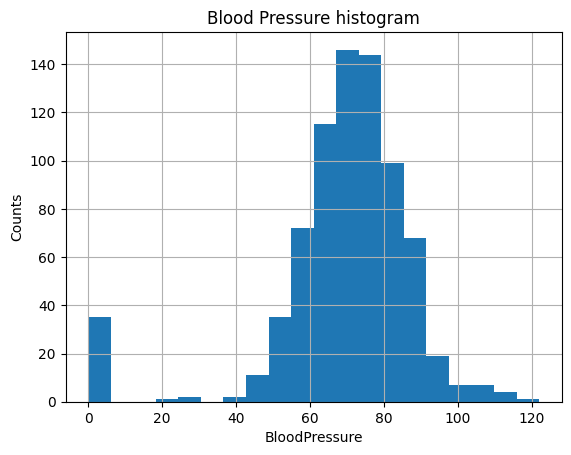

In [90]:
df['BloodPressure'].hist(bins=20)
plt.title('Blood Pressure histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

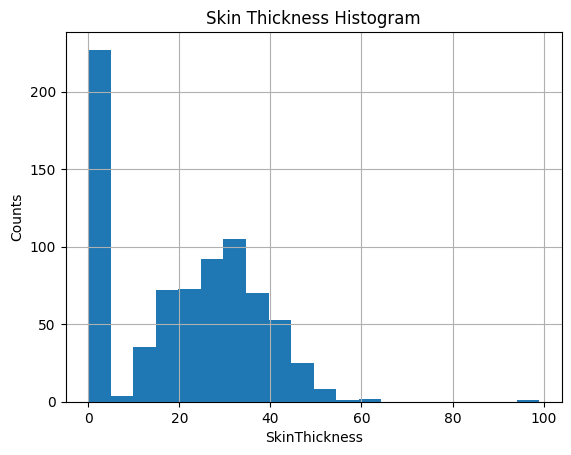

In [91]:
df['SkinThickness'].hist(bins=20)
plt.title('Skin Thickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

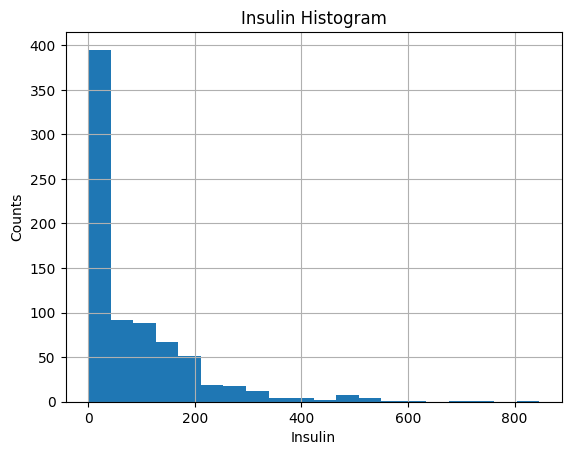

In [92]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

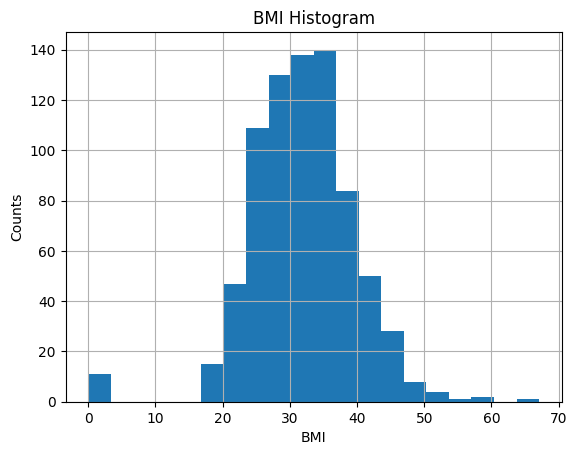

In [93]:
df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

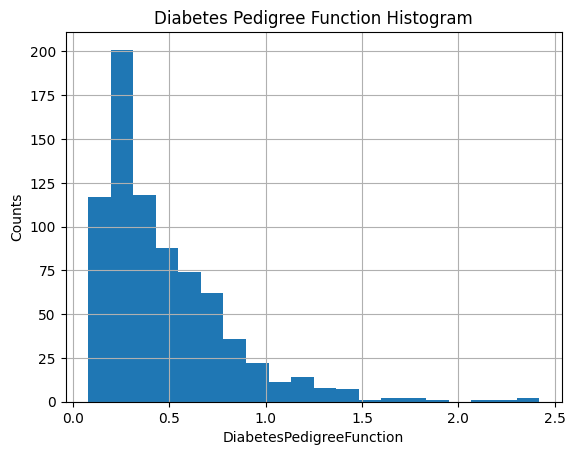

In [94]:
df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('Diabetes Pedigree Function Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

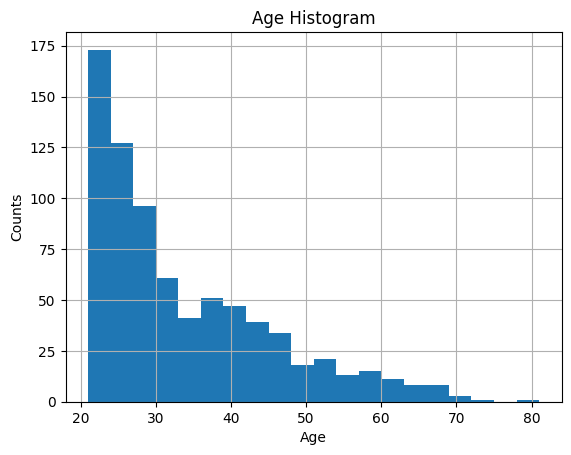

In [95]:
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

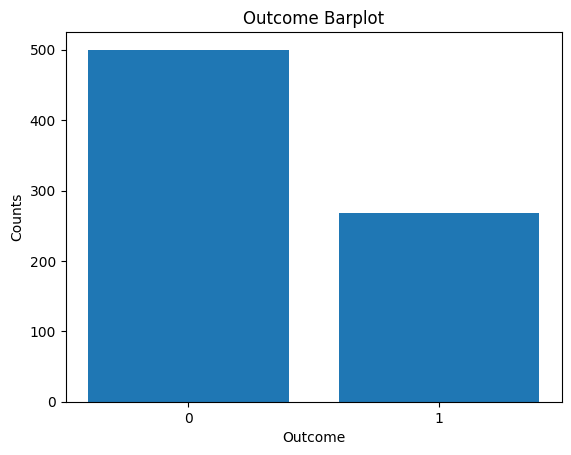

In [96]:
outcome_counts=df['Outcome'].value_counts()
plt.bar(outcome_counts.index,outcome_counts.values)
plt.title('Outcome Barplot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.xticks(outcome_counts.index)
plt.show()

# Ερώτημα 2

Η ποιότητα των δεδομένων που δίνονται είναι σχετικά κακή. Αρχικά, από τα αποτελέσματα που προκύπτουν από τη describe() υπάρχουν μερικές outliers τιμές. Για παράδειγμα, υπάρχουν τιμές οι οποίες είναι 0 σε χαρακτηριστικά που τις καθιστά μη ρεαλιστικές (δε γίνεται κάποιος/α να έχει πίεση 0 ή γλυκόζη 0). Ένα άλλο παράδειγμα είναι ότι υπάρχει τιμή 67 για το BMI κάτι το οποίο είναι αρκετά ακραία τιμή αν σκεφτούμε ότι ένας παχύσαρκος έχει 30-35. Τέλος, παρατηρούμε ότι η τυπική απόκλιση στην ινσουλίνη είναι αρκετά μεγάλη.

# Ερώτημα 3

Η μεταβλητή age ακολουθεί εκθετική κατανομή καθώς όσο αυξάνεται η ηλικία, το πλήθος των ανθρώπων μειώνεται εκθετικά. Η συγκεκριμένη κατανομή είναι καλή για τη πρόβλεψη, καθώς έχουμε κατα βάση αρκετούς ανθρώπους νέους ή μέσης ηλικίας, στους οποίους οι μετρήσεις είναι πιο φυσιολογικές και αντιπροσωπευτικές. Αν για παράδειγμα είχαμε πολλούς ηλικιωμένους, τότε θα είχαμε μετρήσεις που δε θα ήταν αντιπροσωπευτικές (π.χ. χαμηλή πίεση).  

# Ερώτημα 4

Αυτό μπορούμε να το διαπιστώσουμε από τα δεδομένα αν φτιάξουμε ιστογράμματα για τη γλυκόζη για αυτούς που έχουν outcome 0 και για αυτούς που έχουν outcome 1. Παρατηρούμε ότι στο ιστόγραμμα με τους ανθρώπους που έχουν outcome 1 (θετικοί), τα επίπεδα γλυκόζης είναι αρκετά πιο ψηλά από αυτούς που έχουν outcome 0.

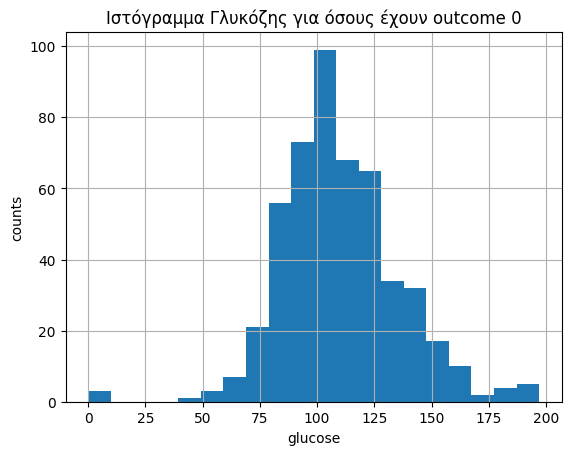

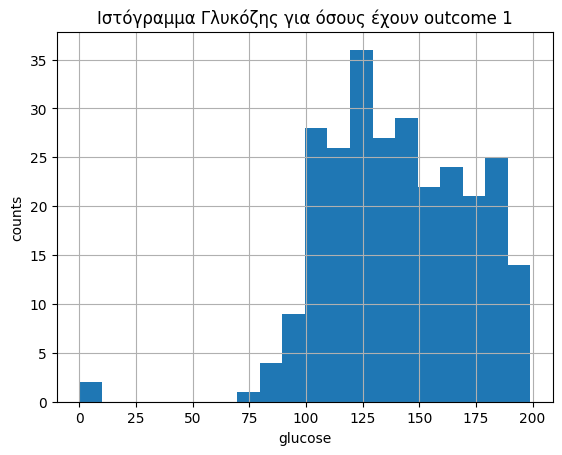

In [97]:
df[df['Outcome']==0]['Glucose'].hist(bins=20)
plt.title('Ιστόγραμμα Γλυκόζης για όσους έχουν outcome 0')
plt.xlabel('glucose')
plt.ylabel('counts')
plt.show()


df[df['Outcome']==1]['Glucose'].hist(bins=20)
plt.title('Ιστόγραμμα Γλυκόζης για όσους έχουν outcome 1')
plt.xlabel('glucose')
plt.ylabel('counts')
plt.show()



# Ερώτημα 5

In [98]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']
x = input_df.to_numpy()
y = targets_df.to_numpy()
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

# Ερώτημα 6

In [99]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
accuracy_percentage = round(accuracy*100, 2)
print(f'Accuracy in train set: {accuracy_percentage}')
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)
print(f'Accuracy in test set: {accuracy_percentage}')

Accuracy in train set: 76.54
Accuracy in test set: 77.92


Παρατηρούμε ότι η ακρίβεια στο σύνολο εκπαίδευσης είναι λίγο μικρότερη (76.54) από αυτή του συνόλου επικύρωσης (77.92).

#Ερώτημα 7

In [100]:
input_df.columns
age_index = 7
mask_25 = x_test[:, 7] <= 25

x_test_25 = x_test[mask_25]
y_test_25 = y_test[mask_25]
y_pred_25 = model.predict(x_test_25)

accuracy = accuracy_score(y_test_25, y_pred_25)
accuracy_percentage_25 = round(accuracy*100, 2)



In [101]:
mask_50 = (x_test[:, 7] > 25) & (x_test[:, 7]<=50)
x_test_50 = x_test[mask_50]
y_test_50 = y_test[mask_50]
y_pred_50 = model.predict(x_test_50)

accuracy = accuracy_score(y_test_50, y_pred_50)
accuracy_percentage_50 = round(accuracy*100, 2)




In [102]:
mask_o50 = (x_test[:, 7] > 50)
x_test_o50 = x_test[mask_o50]
y_test_o50 = y_test[mask_o50]
y_pred_o50 = model.predict(x_test_o50)

accuracy = accuracy_score(y_test_o50, y_pred_o50)
accuracy_percentage_o50 = round(accuracy*100, 2)



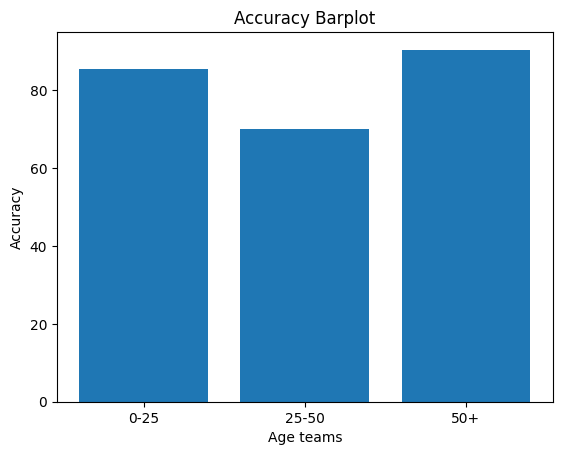

In [103]:
idx=["0-25","25-50","50+"]
accuracies=[accuracy_percentage_25,accuracy_percentage_50,accuracy_percentage_o50]
plt.bar(idx,accuracies)
plt.title('Accuracy Barplot')
plt.xlabel('Age teams')
plt.ylabel('Accuracy')
plt.show()


Ο ταξινομητής έχει την υψηλότερη ακρίβεια στη ηλικιακή ομάδα των 50+ με απόδοση λίγο πάνω από 90%. Επίσης, έχει αρκετά υψηλή ακρίβεια στην ηλικιακή ομάδα των 0-25 με ακρίβεια περίπου στο 85%. Για την ηλικιακή ομάδα 25-50 η ακρίβεια είναι σχετικά χαμηλότερη (σχεδόν 70%).

# Ερώτημα 8

Είναι χειρότερο να προβλέψει πως ο άνθρωπος δεν είναι θετικός ενώ είναι, καθώς μπορεί αυτός καθησυχαστεί ότι δεν είναι θετικός στο διαβήτη και η υγεία του μπορεί να επιδινωθεί. Στην άλλη περίπτωση, μπορεί απλά να δώσει λίγο παραπάνω χρήματα για να κάνει κι άλλες εξετάσεις και να διαπιστώσει ότι τελικά είναι καλά. Σε αυτή τη περίπτωση όπως και να έχει, θα είναι υγιής.

# Ερώτημα 9

In [104]:
for seed in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  x_train.shape, y_train.shape, x_test.shape, y_test.shape
  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_train)
  accuracy = accuracy_score(y_train, y_pred)
  accuracy_percentage = round(accuracy*100, 2)
  print(f'Accuracy in train set: {accuracy_percentage}')
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_percentage = round(accuracy*100, 2)
  print(f'Accuracy in test set: {accuracy_percentage}')
  print('\n')

Accuracy in train set: 76.54
Accuracy in test set: 77.92


Accuracy in train set: 77.28
Accuracy in test set: 78.35


Accuracy in train set: 78.58
Accuracy in test set: 74.89


Accuracy in train set: 78.77
Accuracy in test set: 75.32


Accuracy in train set: 75.98
Accuracy in test set: 80.95


Accuracy in train set: 76.35
Accuracy in test set: 78.35


Accuracy in train set: 76.91
Accuracy in test set: 76.62


Accuracy in train set: 78.21
Accuracy in test set: 77.92


Accuracy in train set: 77.84
Accuracy in test set: 77.92


Accuracy in train set: 80.07
Accuracy in test set: 74.46




# Ερώτημα 10

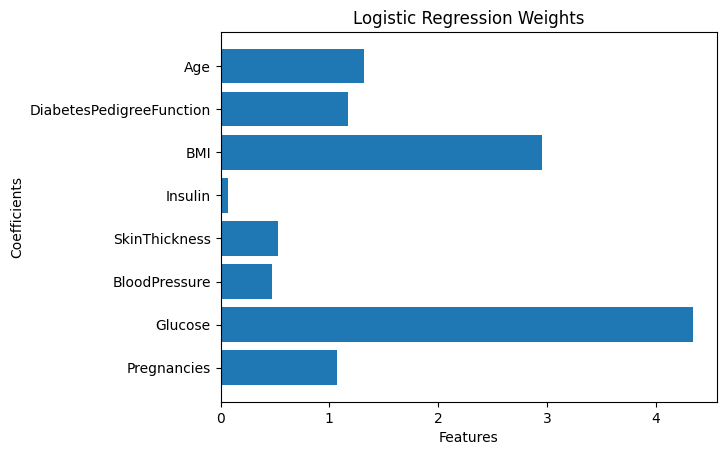

In [105]:
rescaled=df.copy()
for col in df.columns.drop('Outcome'):
  rescaled[col]=(rescaled[col]-rescaled[col].min())/(rescaled[col].max()-rescaled[col].min())
input_resc = rescaled.drop(columns=['Outcome'])
targets_resc = rescaled['Outcome']
x = input_resc.to_numpy()
y = targets_resc.to_numpy()
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_resc.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Σύμφωνα με το barplot τα 3 πιο σημαντικά χαρακτηριστικά είναι το επίπεδο της γλυκόζης, το BMI και η ηλικία. Παρατηρούμε ότι το επίπεδο της γλυκόζης και το BMI είναι οι κύριοι παράγοντες που επηρεάζουν το αν κάποιος είναι θετικός στο διαβήτη, ενώ η ηλικία είναι λίγο πιο σημαντικός παράγοντας από τους υπόλοιπους.

# Ερώτημα 2.1

In [106]:
input_df = df.drop(columns=['Glucose','SkinThickness','Insulin','DiabetesPedigreeFunction','Outcome'])
targets_df = df['Glucose']
x = input_df.to_numpy()
y = targets_df.to_numpy()
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

# Ερώτημα 2.2

In [107]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae_testset=mean_absolute_error(y_test,y_pred)
mse_testset=mean_squared_error(y_test,y_pred)
print(f'mae={mae_testset:.2f}')
print(f'mse={mse_testset:.2f}')

mae=23.60
mse=929.89


Πιο κατάλληλη μετρική είναι η mae καθώς μας δείχνει κατα μέσο όρο κατα πόσο έξω πέφτουν οι προβλέψεις του μοντέλου, ενώ το mse δίνει μεγάλη βαρύτητα σε σημαντικά λάθη.

# Ερώτημα 2.3

In [108]:
alpha=[0.2, 0.4, 0.6, 0.8, 1]
for a in alpha:
  model = Lasso(alpha=a)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mae_testset=mean_absolute_error(y_test,y_pred)
  print(f'mae={mae_testset:.2f} for alpha={a:.1f}')

mae=23.59 for alpha=0.2
mae=23.59 for alpha=0.4
mae=23.58 for alpha=0.6
mae=23.58 for alpha=0.8
mae=23.57 for alpha=1.0


# Ερώτημα 2.4

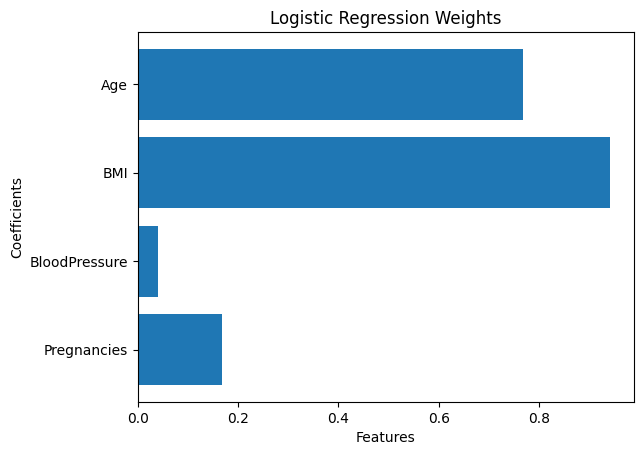

In [109]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae_testset=mean_absolute_error(y_test,y_pred)
coeffs = model.coef_
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Παρατηρούμε ότι ο συντελεστής με τη χαμηλότερη βαρύτητα είναι το BloodPressure οπότε το αφαιρούμε και εκπαιδεύουμε ξανα το μοντέλο χωρίς αυτό.

In [110]:
input_df24 = input_df.drop(columns=['BloodPressure'])
targets_df = df['Glucose']
x = input_df24.to_numpy()
y = targets_df.to_numpy()
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae_testset=mean_absolute_error(y_test,y_pred)
print(f'mae={mae_testset:.2f}')


mae=23.62


Παρατηρούμε ότι η mae αυξήθηκε αλλά πολύ λίγο (23.62 από 23.60). Η αφαίρεση ενός χαρακτηριστικού είναι λογικό να αυξήσει το σφάλμα. Έχουμε όμως μικρή αύξηση, καθώς η βαρύτητα του χαρακτηριστικού που αφαιρέθηκε (BloodPressure) είναι πολύ μικρή (<0.05).